In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

df = pd.read_csv("online_retail.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [4]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [8]:
df["TotalPrice"] = df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


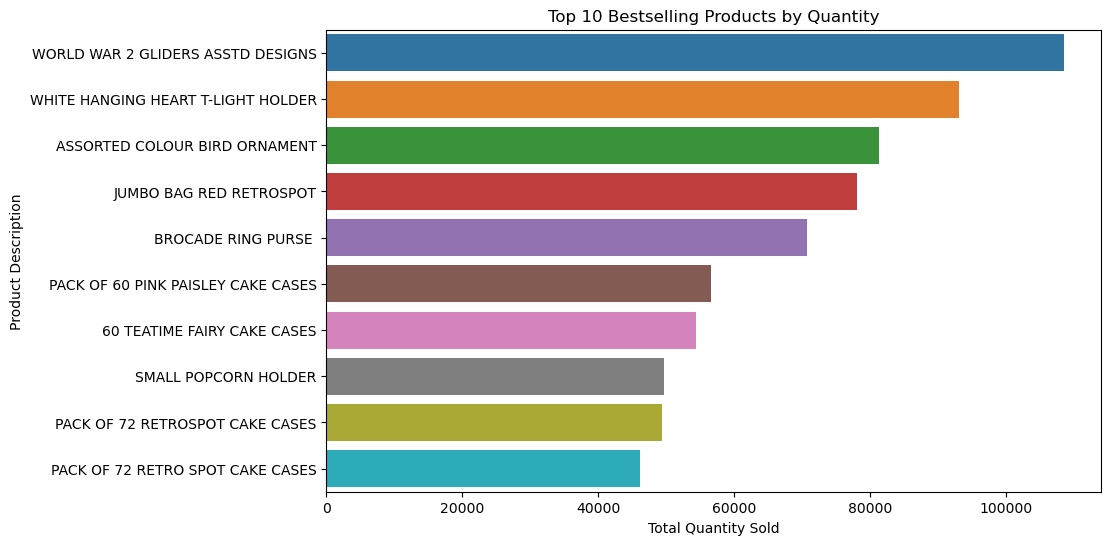

In [9]:
bestseller_by_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bestseller_by_quantity.values, y=bestseller_by_quantity.index)
plt.title("Top 10 Bestselling Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()

In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df["InvoiceYear"] = df["InvoiceDate"].dt.year
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["InvoiceDay"] = df["InvoiceDate"].dt.day
df["InvoiceDow"] = df["InvoiceDate"].dt.dayofweek

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,1
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,1


In [13]:
df["Cancel"] = df["Quantity"] < 0
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,Cancel
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,1,False
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,1,False
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,1,False


In [14]:
df['InvoiceYM'] = df['InvoiceDate'].astype(str).str[:7]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,Cancel,InvoiceYM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,1,False,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,1,False,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,1,False,2009-12


In [15]:
df["InvoiceTime"] = df["InvoiceDate"].dt.time
df["InvoiceHour"] = df["InvoiceDate"].dt.hour
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceDow,Cancel,InvoiceYM,InvoiceTime,InvoiceHour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009,12,1,1,False,2009-12,07:45:00,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False,2009-12,07:45:00,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009,12,1,1,False,2009-12,07:45:00,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009,12,1,1,False,2009-12,07:45:00,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009,12,1,1,False,2009-12,07:45:00,7


<Axes: xlabel='InvoiceYear', ylabel='count'>

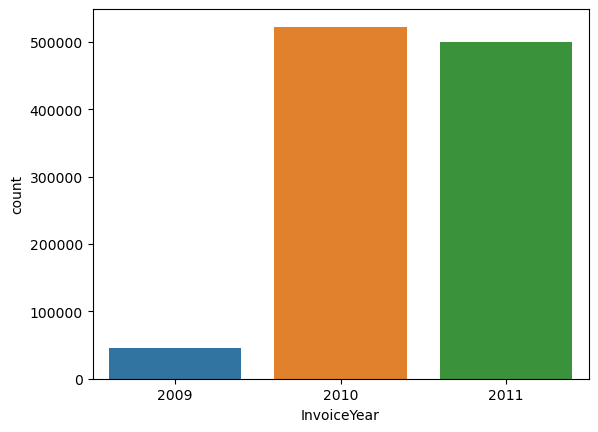

In [16]:
sns.countplot(data=df, x='InvoiceYear')

<Axes: xlabel='InvoiceMonth', ylabel='count'>

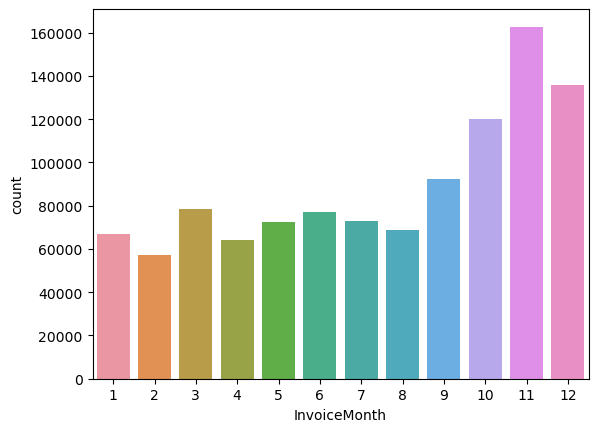

In [17]:
sns.countplot(data=df, x='InvoiceMonth')

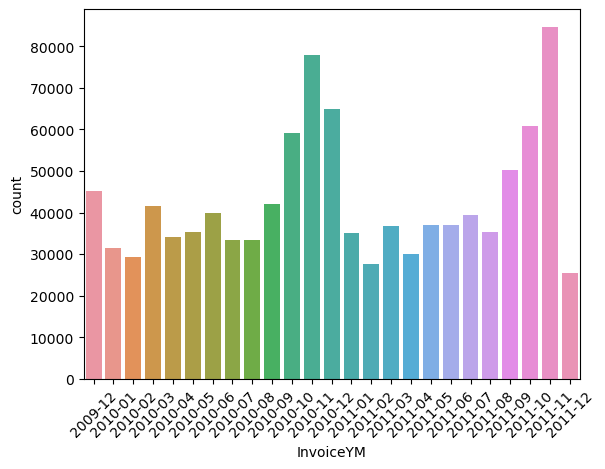

In [18]:
ax = sns.countplot(data=df, x='InvoiceYM')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

<Axes: xlabel='InvoiceDow', ylabel='count'>

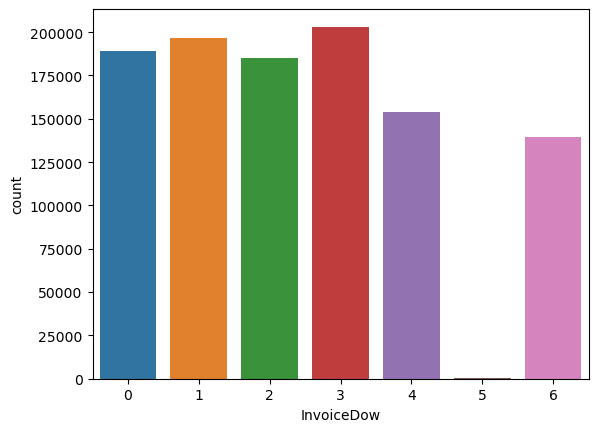

In [19]:
sns.countplot(data=df, x='InvoiceDow')

<Axes: xlabel='InvoiceDow', ylabel='count'>

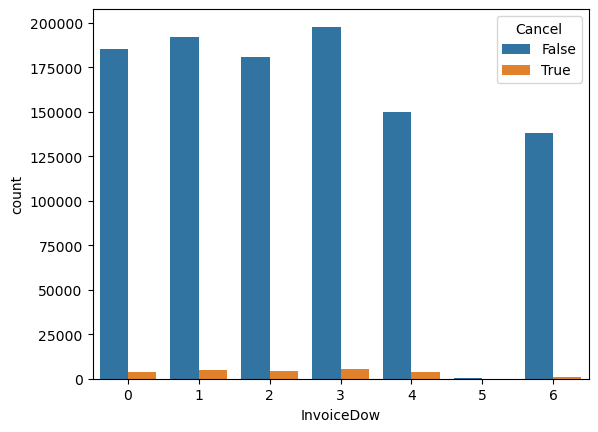

In [20]:
df['Cancel'] = df['Cancel'].astype(str)

sns.countplot(data=df, x='InvoiceDow', hue='Cancel')

In [31]:
saturday_data = df[df['InvoiceDow'] == 5]
print(saturday_data)

      Invoice StockCode                       Description  Quantity  \
12061  490363     84950    ASSORTED COLOUR T-LIGHT HOLDER       192   
12062  490364     48185               DOOR MAT FAIRY CAKE         4   
12063  490364     84836       ZINC METAL HEART DECORATION        12   
12064  490364     22415                 WHITE TISSUE REAM         1   
12065  490364     48187              DOOR MAT NEW ENGLAND         4   
...       ...       ...                               ...       ...   
12458  490394     21955  UNION JACK GUNS & ROSES  DOORMAT         6   
12459  490394    85014A  BLACK/BLUE DOTS RUFFLED UMBRELLA        12   
12460  490394    15056N         EDWARDIAN PARASOL NATURAL        12   
12461  490394     20679             EDWARDIAN PARASOL RED        12   
12462  490394    85014B   RED/WHITE DOTS RUFFLED UMBRELLA        12   

              InvoiceDate  Price  Customer ID         Country  TotalPrice  \
12061 2009-12-05 10:11:00   0.72      13199.0  United Kingdom      138

In [33]:
cancelled_saturday_data = df[(df['InvoiceDow'] == 5) & (df['Cancel'] == 1)]
print(cancelled_saturday_data)


Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country, TotalPrice, InvoiceYear, InvoiceMonth, InvoiceDay, InvoiceDow, Cancel, InvoiceYM, InvoiceTime, InvoiceHour]
Index: []


<Axes: xlabel='InvoiceHour', ylabel='count'>

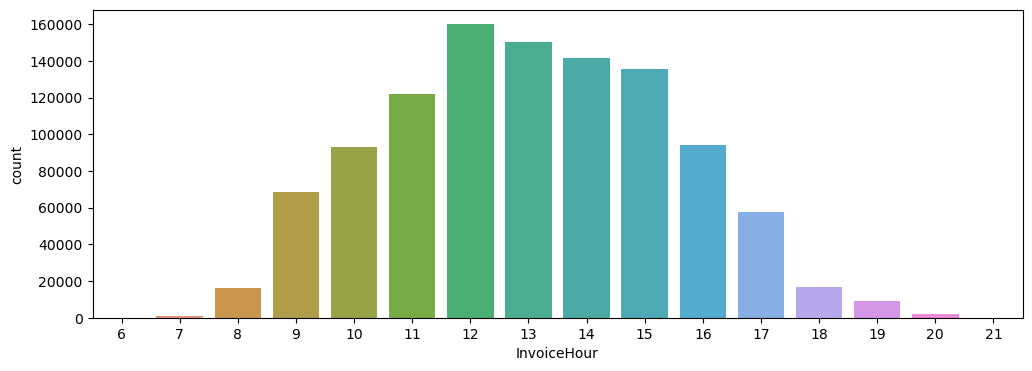

In [35]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='InvoiceHour')

<Axes: xlabel='InvoiceHour', ylabel='TotalPrice'>

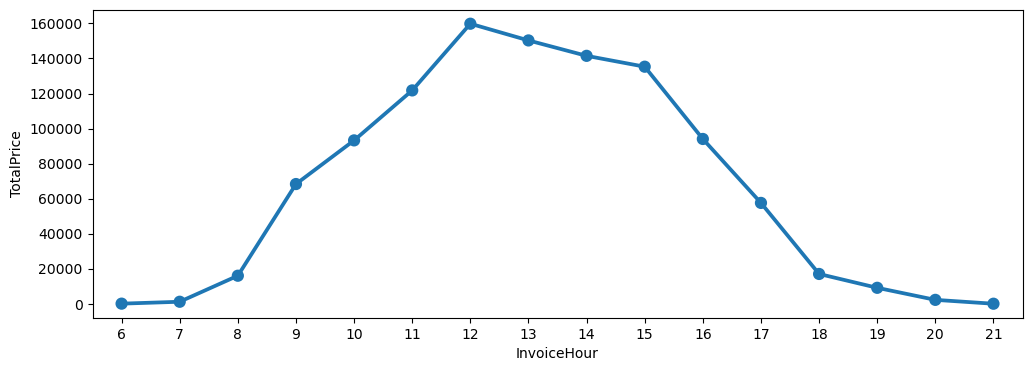

In [36]:
plt.figure(figsize=(12, 4))
sns.pointplot(data=df, x="InvoiceHour", y='TotalPrice',
				estimator='count', errorbar=None)

In [38]:
df['Hour'] = df['InvoiceDate'].dt.hour

df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

hour_dow = df.pivot_table(index='Hour', columns='DayOfWeek', aggfunc='size', fill_value=0)

In [39]:
hour_dow.style.background_gradient(cmap='PuBuGn_r').format("{:,}")

DayOfWeek,0,1,2,3,4,5,6
Hour,,,,,,,
6,0,0,0,41,0,0,0
7,163,254,181,290,239,0,0
8,"3,003","2,976","3,517","3,108","3,381",0,0
9,"15,570","13,627","11,978","13,818","13,242",0,89
10,"17,886","16,100","15,420","17,675","17,016",30,"9,121"
11,"19,562","19,608","20,144","18,926","20,336",4,"23,200"
12,"26,151","28,628","28,791","25,802","21,369",102,"29,003"
13,"27,240","27,248","25,007","25,607","19,116",102,"25,988"
14,"23,066","24,384","25,339","26,030","21,853",57,"20,784"


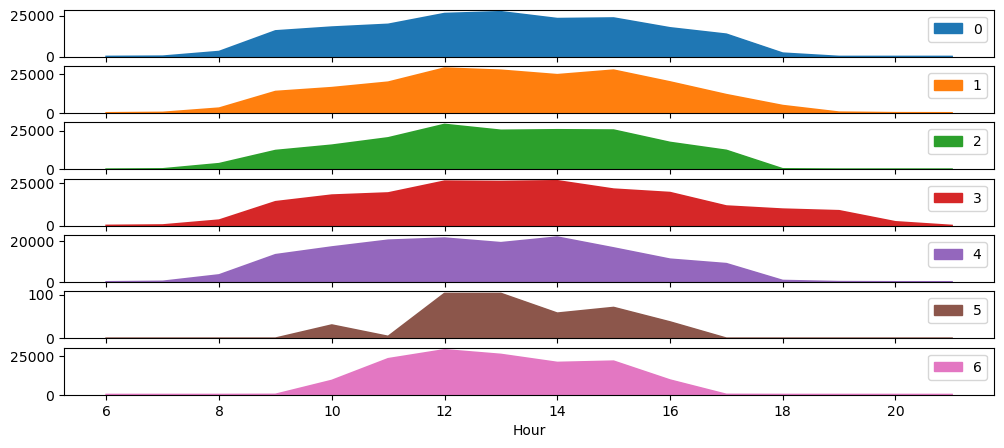

In [40]:
hour_dow.plot.area(figsize=(12, 5), subplots=True);

In [41]:
!pip install xlrd

In [42]:
!pip install openpyxl

In [43]:
df["StockCode"].nunique()

5305

In [44]:
df["StockCode"].value_counts().head()

StockCode
85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
Name: count, dtype: int64

In [45]:
df.groupby("StockCode").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head

<bound method NDFrame.head of            Quantity
StockCode          
84077        108545
85123A        96066
85099B        95739
21212         95450
84879         80705
...             ...
10120         -8350
23003         -8516
23005        -14418
22126        -16400
20852        -18800

[5305 rows x 1 columns]>

In [46]:
df["Invoice"].nunique()

53628

In [47]:
df.dropna(inplace=True)

In [48]:
df.isnull().sum()

Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
TotalPrice      0
InvoiceYear     0
InvoiceMonth    0
InvoiceDay      0
InvoiceDow      0
Cancel          0
InvoiceYM       0
InvoiceTime     0
InvoiceHour     0
Hour            0
DayOfWeek       0
dtype: int64

In [49]:
df=df[~df["Invoice"].str.contains("C", na=False)]

In [50]:
df= df[(df["Quantity"]>0)]

In [51]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,805620.0,13.307665,1.0,2.0,5.0,12.0,80995.0,144.306739
InvoiceDate,805620,2011-01-02 10:26:35.704326144,2009-12-01 07:45:00,2010-07-07 12:08:00,2010-12-03 15:10:00,2011-07-28 13:28:00,2011-12-09 12:50:00,NaN
Price,805620.0,3.206279,0.0,1.25,1.95,3.75,10953.5,29.197901
Customer ID,805620.0,15331.85625,12346.0,13982.0,15271.0,16805.0,18287.0,1696.768395
TotalPrice,805620.0,22.024564,0.0,4.95,11.85,19.5,168469.6,224.03215
InvoiceYear,805620.0,2010.423281,2009.0,2010.0,2010.0,2011.0,2011.0,0.56611
InvoiceMonth,805620.0,7.507329,1.0,5.0,8.0,11.0,12.0,3.446663
InvoiceDay,805620.0,15.203904,1.0,8.0,15.0,23.0,31.0,8.694811
InvoiceDow,805620.0,2.652574,0.0,1.0,3.0,4.0,6.0,1.95399
InvoiceHour,805620.0,12.801992,6.0,11.0,13.0,14.0,20.0,2.290118


In [52]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [53]:
#분석의 기준이 되는 날짜 설정
today_date = dt.datetime(2011, 12, 11)

In [54]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [55]:
#고객의 마지막 구매일과 기준 날짜간의 차이 구하기
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days, 
    'Invoice': lambda num: num.nunique(),  
    'TotalPrice': lambda TotalPrice: TotalPrice.sum()  
})

In [56]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [57]:
#구매기록이 없는 고객 제거
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [58]:
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,3,8,5633.32
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40
...,...,...,...
18283.0,4,22,2736.65
18284.0,432,1,461.68
18285.0,661,1,427.00


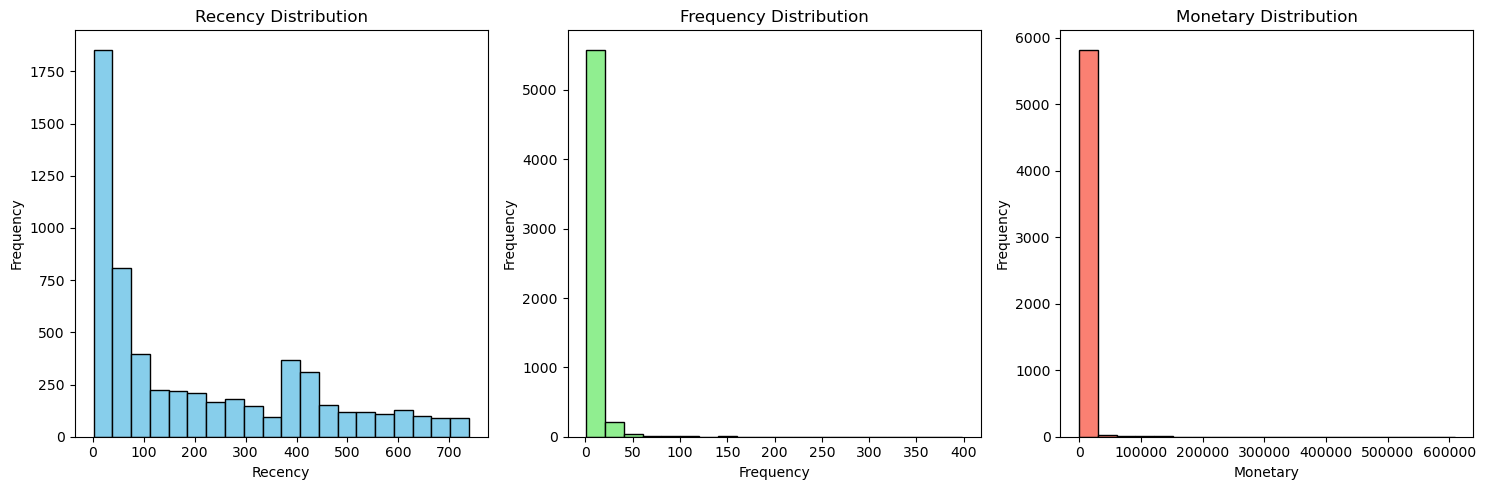

In [59]:
plt.figure(figsize=(15, 5))

# Recency distribution
plt.subplot(1, 3, 1)
plt.hist(rfm['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Frequency distribution
plt.subplot(1, 3, 2)
plt.hist(rfm['Frequency'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Frequency')

# Monetary distribution
plt.subplot(1, 3, 3)
plt.hist(rfm['Monetary'], bins=20, color='salmon', edgecolor='black')
plt.title('Monetary Distribution')
plt.xlabel('Monetary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [61]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [62]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [63]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [64]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [65]:
rfm

,Recency,Frequency,Monetary,R_Score,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,,
12346.0,326,12,77556.46,2,2,5,5,255
12347.0,3,8,5633.32,5,5,4,5,545
12348.0,76,5,2019.40,3,3,4,4,344
12349.0,19,4,4428.69,5,5,3,5,535
12350.0,311,1,334.40,2,2,1,2,212
...,...,...,...,...,...,...,...,...
18283.0,4,22,2736.65,5,5,5,4,554
18284.0,432,1,461.68,1,1,2,2,122
18285.0,661,1,427.00,1,1,2,2,122


In [67]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [68]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

In [69]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [70]:
rfm

,Recency,Frequency,Monetary,R_Score,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,,
12346.0,326,12,77556.46,2,2,5,5,255,Cant_Loose
12347.0,3,8,5633.32,5,5,4,5,545,Champions
12348.0,76,5,2019.40,3,3,4,4,344,Loyal_Customers
12349.0,19,4,4428.69,5,5,3,5,535,Potential_Loyalists
12350.0,311,1,334.40,2,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...,...
18283.0,4,22,2736.65,5,5,5,4,554,Champions
18284.0,432,1,461.68,1,1,2,2,122,Hibernating
18285.0,661,1,427.00,1,1,2,2,122,Hibernating


In [71]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About_to_Sleep       107.618557   388   1.360825   388    531.969905   388
At_Risk              373.942667   750   3.904000   750   1383.596253   750
Cant_Loose           331.802817    71  15.929577    71   8355.677634    71
Champions              9.250000   852  19.217136   852  10795.520581   852
Hibernating          460.012484  1522   1.252300  1522    437.963135  1522
Loyal_Customers       68.306016  1147   9.803836  1147   4199.728592  1147
Need_Attention       114.241636   269   3.156134   269   1283.114015   269
New_Customers         11.303571    56   1.000000    56    356.257857    56
Potential_Loyalists   26.297335   713   2.589060   713   1155.427281   713
Promising             39.281818   110   1.000000   110    324.497000   110

In [72]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count",
                                                                             "min", "median", "max"])

Recency                         Frequency            \
                           mean count  min median  max       mean count min   
Segment                                                                       
About_to_Sleep       107.618557   388   60   94.0  190   1.360825   388   1   
At_Risk              373.942667   750  191  377.0  734   3.904000   750   2   
Cant_Loose           331.802817    71  193  326.0  577  15.929577    71   8   
Champions              9.250000   852    1    9.0   20  19.217136   852   4   
Hibernating          460.012484  1522  191  435.0  739   1.252300  1522   1   
Loyal_Customers       68.306016  1147   22   54.0  190   9.803836  1147   4   
Need_Attention       114.241636   269   60  107.0  190   3.156134   269   2   
New_Customers         11.303571    56    1   11.0   20   1.000000    56   1   
Potential_Loyalists   26.297335   713    1   24.0   59   2.589060   713   1   
Promising             39.281818   110   22   38.5   59   1.000000   110   1   

                                     Monetary                          \
                    median  max          mean count     min    median   
Segment                                                                 
About_to_Sleep         1.0    2    531.969905   388    6.20   370.175   
At_Risk                4.0    8   1383.596253   750   38.92   965.510   
Cant_Loose            11.0  155   8355.677634    71  628.32  3881.890   
Champions             11.5  398  10795.520581   852  357.00  4009.870   
Hibernating            1.0    2    437.963135  1522    2.95   285.205   
Loyal_Customers        8.0  107   4199.728592  1147   30.95  2602.320   
Need_Attention         3.0    4   1283.114015   269  120.90   977.170   
New_Customers          1.0    1    356.257857    56   43.20   262.680   
Potential_Loyalists    3.0    4   1155.427281   713   20.80   692.190   
Promising              1.0    1    324.497000   110   30.00   221.620   

                                
                           max  
Segment                         
About_to_Sleep         5416.32  
At_Risk               44534.30  
Cant_Loose            77556.46  
Champions            608821.65  
Hibernating           13916.34  
Loyal_Customers      144458.37  
Need_Attention        39916.50  
New_Customers          3861.00  
Potential_Loyalists  168472.50  
Promising              1635.66